In [1]:
# import necessary libraries
import pandas as pd  
from sklearn.preprocessing import StandardScaler  
import scipy.cluster.hierarchy as sch  
import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering  
from sklearn.metrics import adjusted_rand_score, silhouette_score  

In [2]:
# load the dataset into a pandas DataFrame
df = pd.read_csv('dermatology.csv', delimiter='\t')

# convert 'Age' column to numeric for prepare categorization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# categorize the 'Age' column as age is continuous
for i in range(len(df)):
    age = df.iloc[i]['Age']
    
    if age == '?':
        df.iloc[i, df.columns.get_loc('Age')] = None 
        continue
        
    category = 0
    if 18 < age <= 35:
        category = 1
    elif age <= 50:
        category = 2
    elif age <= 65:
        category = 3
    elif age <= 125:
        category = 4
    df.iloc[i, df.columns.get_loc('Age')] = category

# clean the dataset for missing and NaN values
df = df.dropna()

# print the first five entries
print(df.head())

   Erythema  Scathing  Definite Borders  Itching  Koebner   Polygonal  \
0         2         2                 0        3         0          0   
1         3         3                 3        2         1          0   
2         2         1                 2        3         1          3   
3         2         2                 2        0         0          0   
4         2         3                 2        2         2          2   

   Follicular  Oral  Knee  Scalp  ...  Disapperance  Vacuolisation  \
0           0     0     1      0  ...             0              0   
1           0     0     1      1  ...             0              0   
2           0     3     0      0  ...             0              2   
3           0     0     3      2  ...             3              0   
4           0     2     0      0  ...             2              3   

   Spongiosis  Retes  Follicular.1  Perifollicular  Inflamatory  Band-like  \
0           3      0             0               0            

In [3]:
# standardize the dataset
scaler = StandardScaler()
scaler.fit_transform(df)

array([[-0.1028946 ,  0.29250271, -1.70937509, ..., -0.50221531,
         1.44973424, -0.50342761],
       [ 1.40348234,  1.71991595,  1.60084334, ..., -0.50221531,
         0.22995784, -1.13014361],
       [-0.1028946 , -1.13491053,  0.49743719, ...,  2.2142005 ,
        -0.98981855,  0.12328839],
       ...,
       [ 1.40348234,  0.29250271,  0.49743719, ...,  2.2142005 ,
        -0.98981855,  0.12328839],
       [-0.1028946 , -1.13491053,  1.60084334, ...,  2.2142005 ,
         0.22995784,  0.12328839],
       [ 1.40348234,  0.29250271,  0.49743719, ..., -0.50221531,
        -0.98981855, -1.13014361]])

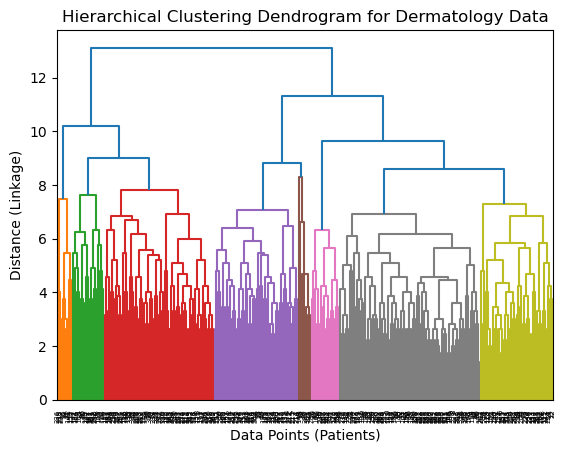

In [4]:
# compute the linkage matrix using 'complete' linkage
linkage_matrix = sch.linkage(df, method='complete')

# plot the dendrogram
plt.xlabel("Data Points (Patients)")
plt.ylabel("Distance (Linkage)")
plt.title("Hierarchical Clustering Dendrogram for Dermatology Data")
dendrogram = sch.dendrogram(linkage_matrix, color_threshold=linkage_matrix[-(8 - 1), 2])
plt.show()

In [5]:
# initialize Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=8, linkage='complete')

# fit and predict the clusters
predictions = cluster.fit_predict(df)

# print the assigned cluster labels
print(predictions)

[7 5 6 2 6 7 3 6 7 7 2 7 7 2 6 7 1 2 6 3 4 7 3 6 3 2 4 3 7 6 2 1 5 2 3 1 6
 7 6 2 7 7 2 7 3 0 7 4 7 0 6 3 2 2 3 2 7 6 7 7 4 2 3 2 7 6 2 7 3 2 7 4 0 3
 7 7 7 5 0 3 5 7 7 7 3 5 5 0 2 7 7 1 3 5 6 7 7 3 5 4 7 3 5 7 7 2 7 2 6 5 5
 6 3 6 6 3 7 6 7 2 7 3 4 5 5 7 4 6 3 7 2 5 6 3 3 2 7 7 6 5 7 1 5 0 6 6 7 3
 7 7 7 1 1 2 3 0 7 6 7 7 7 7 6 4 7 5 5 6 7 6 6 2 2 2 6 2 2 7 6 6 2 2 2 2 4
 7 7 7 7 2 6 6 6 2 2 7 6 7 7 7 3 3 3 3 3 2 2 2 2 2 2 2 6 6 6 6 6 6 7 7 7 7
 3 3 3 3 3 3 3 7 7 7 7 2 5 1 1 1 1 4 4 2 5 2 2 2 2 2 2 6 6 6 6 6 6 6 7 7 7
 7 7 7 3 3 3 3 4 4 4 7 7 7 2 2 2 2 2 7 7 7 7 7 2 2 7 7 7 0 6 0 6 2 2 2 2 3
 3 3 3 3 6 0 6 7 2 2 7 7 7 2 2 2 6 6 6 6 6 2 2 2 2 7 7 2 2 7 6 6 7 2 2 7 7
 3 3 2 2 3 3 6 2 3 3 4 4 7 7 4 4 4 2 5 5 3 3 5 5 2 2 7 7 7 7 6 6 2]


In [6]:
# extract true labels
true_labels = df['Disease'].values

# calculate and print ARI for Agglomerative Clustering
ari = adjusted_rand_score(true_labels, predictions)
print(f'Adjusted Rand Index for Agglomerative Clustering: {ari}')

# calculate and print Silhouette Score for Agglomerative Clustering
silhouette = silhouette_score(df, predictions)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette}')

Adjusted Rand Index for Agglomerative Clustering: 0.6908984742640567
Silhouette Score for Agglomerative Clustering: 0.1996936178272198
